In [1]:
#Import the summary of the library in fungsi_save.ipynb 
%run fungsi_save.ipynb

In [9]:
X = pd.read_csv('rev3_data_baru_norm_training.csv', sep=',',header=None) #read training data file
X = X.values #convert training data to array
total_features = np.size(X, axis=1)-3 #number of features
print(total_features)
y = X[:,total_features] #output for lymphoid classification (first step)
y = np.int_(y) #change the values to integer
#print(y)
X = X[:,:total_features] #all features 
#X

29


In [10]:
total_features

29

In [11]:
y #output NN-PSO Stage 1

array([0, 1, 1, ..., 1, 0, 0])

In [12]:
#########Copy from PySwarm example############

from sklearn import linear_model

# Create an instance of the classifier
classifier = linear_model.LogisticRegression()

# Define objective function
def f_per_particle(m, alpha):
    """Computes for the objective function per particle

    Inputs
    ------
    m : numpy.ndarray
        Binary mask that can be obtained from BinaryPSO, will
        be used to mask features.
    alpha: float (default is 0.5)
        Constant weight for trading-off classifier performance
        and number of features

    Returns
    -------
    numpy.ndarray
        Computed objective function
    """
    global total_features
    # Get the subset of the features from the binary mask
    if np.count_nonzero(m) == 0:
        X_subset = X
    else:
        X_subset = X[:,m==1]
    # Perform classification and store performance in P
    classifier.fit(X_subset, y)
    P = (classifier.predict(X_subset) == y).mean()
    # Compute for the objective function
    j = (alpha * (1.0 - P)
        + (1.0 - alpha) * (1 - (X_subset.shape[1] / total_features)))

    return j

In [13]:
#########Copy from PySwarm example############

def f(x, alpha=0.88):
    """Higher-level method to do classification in the
    whole swarm.

    Inputs
    ------
    x: numpy.ndarray of shape (n_particles, dimensions)
        The swarm that will perform the search

    Returns
    -------
    numpy.ndarray of shape (n_particles, )
        The computed loss for each particle
    """
    n_particles = x.shape[0]
    j = [f_per_particle(x[i], alpha) for i in range(n_particles)]
    return np.array(j)

In [14]:
#########Copy from PySwarm example############

#Initialize swarm, arbitrary
options = {'c1': 0.5, 'c2': 0.5, 'w':0.9, 'k': 30, 'p':2}

# Call instance of PSO
dimensions = total_features # dimensions should be the number of features

optimizer = ps.discrete.BinaryPSO(n_particles=30, dimensions=dimensions, options=options)

# Perform optimization
cost, pos = optimizer.optimize(f, iters=25)

2021-05-11 22:06:10,245 - pyswarms.discrete.binary - INFO - Optimize for 25 iters with {'c1': 0.5, 'c2': 0.5, 'w': 0.9, 'k': 30, 'p': 2}
pyswarms.discrete.binary: 100%|█████████████████████████████████████████████████████████████████|25/25, best_cost=0.111
2021-05-11 22:07:32,178 - pyswarms.discrete.binary - INFO - Optimization finished | best cost: 0.1105889357479534, best pos: [1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 1 1 1 0 1]


In [15]:
#########Copy from PySwarm example############

# Create two instances of LogisticRegression
classifier = linear_model.LogisticRegression()

# Get the selected features from the final positions
X_selected_features = X[:,pos==1]  # subset
X_non_selected_features = X[:,pos==0]
# Perform classification and store performance in P
classifier.fit(X_selected_features, y)
print(np.size(X_selected_features,1))
# Compute performance
subset_performance = (classifier.predict(X_selected_features) == y).mean()


print('Subset performance: %.3f' % (subset_performance))

24
Subset performance: 0.898


In [16]:
X_non_selected_features

array([[0.17391968, 0.34782057, 0.59072767, 0.42035761, 0.29021789],
       [0.30835808, 0.26731326, 0.08354087, 0.82719052, 0.84939207],
       [0.29550991, 0.11605384, 0.182949  , 0.66515879, 0.72618649],
       ...,
       [0.50154903, 0.37016853, 0.15211211, 0.7645065 , 0.78983127],
       [0.67861299, 0.41137883, 0.27596411, 0.71865274, 0.67863338],
       [0.08094515, 0.50505654, 0.58459272, 0.39311921, 0.17694923]])

In [17]:
optimizer.cost_history

[0.13473778218804267,
 0.11438749689903248,
 0.11438749689903248,
 0.11438749689903248,
 0.11438749689903248,
 0.11438749689903248,
 0.11438749689903248,
 0.11438749689903248,
 0.11438749689903248,
 0.11438749689903248,
 0.11438749689903248,
 0.11438749689903248,
 0.11438749689903248,
 0.11438749689903248,
 0.11438749689903248,
 0.11438749689903248,
 0.1105889357479534,
 0.1105889357479534,
 0.1105889357479534,
 0.1105889357479534,
 0.1105889357479534,
 0.1105889357479534,
 0.1105889357479534,
 0.1105889357479534,
 0.1105889357479534]

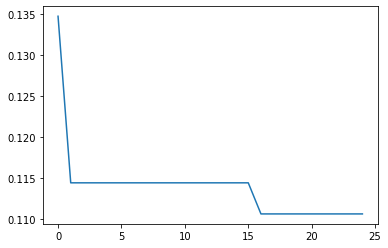

In [18]:
a = []
for i in range(len(optimizer.cost_history)):
    a.append(i)
b = optimizer.cost_history
plt.plot(a,b)
plt.show()

In [19]:
pos.shape
X_selected_features[0]

array([0.23290321, 0.1880663 , 0.80561347, 0.46743473, 0.45973021,
       0.21574129, 0.08051798, 0.28606383, 0.61069057, 0.19392608,
       0.75829173, 0.27244226, 0.89808411, 0.764981  , 0.13628818,
       0.59393149, 0.61649561, 0.71176946, 0.24770907, 0.34098131,
       0.29014588, 0.1609526 , 0.71176292, 0.405438  ])

In [120]:
#y = np.array([y])
#y2 = np.array([y2])

In [121]:
#y.T.shape

In [122]:
#data_baru1 = np.concatenate((X, y.T), axis=1) #data semua +output1 
#data_baru1 = np.concatenate((data_baru1, y2.T), axis=1) #data semua +output1 +output2

In [124]:
save_data_feature1(pos) #data semua + pos beda file

In [ ]:
pos

In [125]:
pos = [i for i in pos]
pos

[1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1]

In [126]:
save_pos_step1('fix3(imbalanced)\step1\seleksi_fitur\hasil_step1.csv', (pos,optimizer.cost_history,subset_performance))